## Projeto 1- Simulaçao física com auto vetorização - Paulo Tozzo

## O Problema

Foi implementado uma simulação simples de choque elastico entre retangulos que estão dentro de um quadro tambem de forma retangular, esses retangulos podem se mover no eixo x e y e em caso de colisão ocore um choque perfeitamente elastico, tambem é possivel definir um atrito dinamico universal que irá a cada iteração diminuir a velocidade dos retangulos. Ao compilar o programa ouve uma tentativa de optimizar ele usando autovectorização do gcc.

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Descrição dos testes
Foi realizado 2 testes de desempenho eles foram compilados de 4 formas diferentes, um usando a flag `O3` , outra `O0`, `O2` e o ultimo usando `O3 ftree-vectorize mavx ffast-math`, o primeiro teste realiza uma simulação simples, ja o segundo é mais compliacado e é usado para medir precisamente o tempo do codigo, que foi medido usando o `std::chrono::high_resolution_clock`. Para diminuir a variação de tempo os testes foi executados 100 vezes e foi feito a media. O computador que executou os testes tem como hardware releventa um processador Intel core i7-5500U CPU @ 2.40GHz

## teste 1
teste simples que retangulos colidem na diagonal e logo depois com a borda.


In [2]:
with open('teste1', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_fast = [];
time_two = [];
time_zero = [];

for i in range(100):
    main = subprocess.run(["build/main"],input = data,capture_output=True)
    main_fast = subprocess.run(["build/main_fast"],input = data,capture_output=True)
    main_two = subprocess.run(["build/main_two"],input = data,capture_output=True)
    main_zero = subprocess.run(["build/main_zero"],input = data,capture_output=True)
    
    time_main.append(float((main.stderr).decode("utf-8")))
    time_fast.append(float((main_fast.stderr).decode("utf-8")))
    time_two.append(float((main_two.stderr).decode("utf-8")))
    time_zero.append(float((main_zero.stderr).decode("utf-8")))

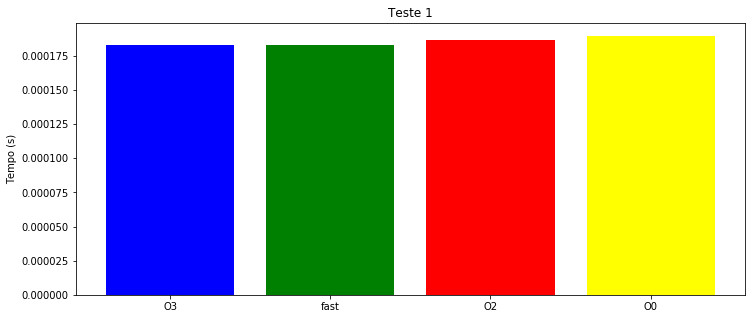

In [3]:
x = np.arange(4)
mean_list = [np.mean(time_main),np.mean(time_fast),np.mean(time_two),np.mean(time_zero)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green", "red", "yellow"])
plt.xticks(x, ["O3","fast","O2","O0"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1")
plt.show()

A barra verde chamda de fast é o executavel compilado com `O3 ftree-vectorize mavx ffast-math`

## teste 2
teste mais complexo que contem 13 retangulos com velocidades aleatórias e com um max_time alto. 

In [4]:
with open('final_test', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_fast = [];
time_two = [];
time_zero = [];

for i in range(100):
    main = subprocess.run(["build/main"],input = data,capture_output=True)
    main_fast = subprocess.run(["build/main_fast"],input = data,capture_output=True)
    main_two = subprocess.run(["build/main_two"],input = data,capture_output=True)
    main_zero = subprocess.run(["build/main_zero"],input = data,capture_output=True)
    
    time_main.append(float((main.stderr).decode("utf-8")))
    time_fast.append(float((main_fast.stderr).decode("utf-8")))
    time_two.append(float((main_two.stderr).decode("utf-8")))
    time_zero.append(float((main_zero.stderr).decode("utf-8")))



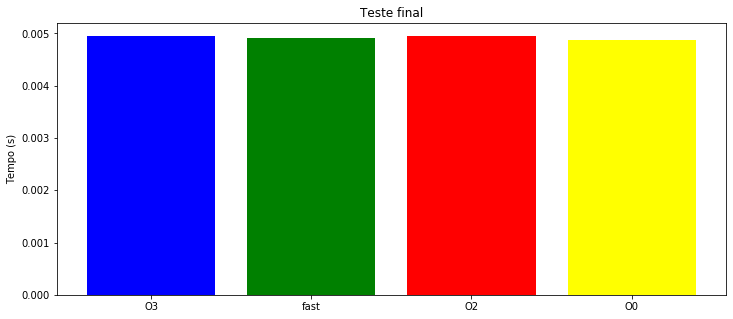

In [5]:
x = np.arange(4)
mean_list = [np.mean(time_main),np.mean(time_fast),np.mean(time_two),np.mean(time_zero)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green", "red", "yellow"])
plt.xticks(x, ["O3","fast","O2","O0"])
plt.ylabel("Tempo (s)")
plt.title("Teste final")
plt.show()

## Conclusão
podemos ver que os tempos não tem uma alteração siginificativa, da maneira que o array foi implementado nesse codigo, usando um array de classes, o gcc não conseguiu auto vetorizar muitas operaçoes, usando a flag `-fopt-info-vec-all`, `-fopt-info-vec-missed`,`-fopt-info-vec-all` foi posivel ver que houve muita pouca auto vetorização.

- O codigo usa uma classe chamada square que pode ser encomtrada em square.cpp e square.hpp
- primeiramente todos os inputs são lidos atravez do cin
- com essa informaçoes começa o loop principal que continua até o tempo chegar em `max_iter`<br>
o loop principal é divido em quatro partes distintas:<br>
 primeiramente são calculados as procimas posiçoes dos objetos, sua velocidade alterada pela fricção e se eles estiverem muito lentos a simulaçãp para<br>
 o segundo passo é calcular todas as batidas entres os retangulos e as batidas com as bordas<br>
 o terceiro passo é ver se um retangulo não bater a sua posição e velocidade são alterados, se ele bater somente a velocidade, assim não é possivel ter uma posição invalida.<br>
 finalmente as imformaçoes atuas saem com um cout de acordo com o `print_freq`